## Objective:

Analyze financial transactions to detect fraud patterns and assess risk.

Step 1: Load & Explore the Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

financial_df = pd.read_csv("financial_risk_data_uncleaned.csv")

# Check dataset info
print(financial_df.info())

# Check missing values
print(financial_df.isnull().sum())

# Check unique values in 'Fraud_Risk'
print(financial_df["Fraud_Risk"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Client_ID           3040 non-null   object 
 1   Transaction_ID      3040 non-null   object 
 2   Transaction_Type    2939 non-null   object 
 3   Account_Type        3040 non-null   object 
 4   Transaction_Amount  2836 non-null   float64
 5   Fraud_Risk          3040 non-null   object 
 6   Transaction_Date    3040 non-null   object 
dtypes: float64(1), object(6)
memory usage: 166.4+ KB
None
Client_ID               0
Transaction_ID          0
Transaction_Type      101
Account_Type            0
Transaction_Amount    204
Fraud_Risk              0
Transaction_Date        0
dtype: int64
['Low' 'Medium' 'Unknown' 'High']


In [2]:
# Drop duplicates
financial_df = financial_df.drop_duplicates()

# Fill missing numerical values with median
financial_df["Transaction_Amount"].fillna(financial_df["Transaction_Amount"].median(), inplace=True)

# Fill missing categorical values with mode
financial_df["Transaction_Type"].fillna(financial_df["Transaction_Type"].mode()[0], inplace=True)

# Replace "Unknown" with the most frequent fraud risk level
financial_df["Fraud_Risk"].replace("Unknown", financial_df["Fraud_Risk"].mode()[0], inplace=True)

# Verify cleaning
print(financial_df.isnull().sum())

Client_ID             0
Transaction_ID        0
Transaction_Type      0
Account_Type          0
Transaction_Amount    0
Fraud_Risk            0
Transaction_Date      0
dtype: int64


C:\Users\WX978SA\AppData\Local\Temp\ipykernel_19552\4274751962.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  financial_df["Transaction_Amount"].fillna(financial_df["Transaction_Amount"].median(), inplace=True)
C:\Users\WX978SA\AppData\Local\Temp\ipykernel_19552\4274751962.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

Step 3: Fraud Risk Analysis
✅ Identify high-risk transactions.
✅ Analyze transaction types linked to fraud.

C:\Users\WX978SA\AppData\Local\Temp\ipykernel_19552\2800773539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fraud_Risk", y="Transaction_Amount", data=financial_df, palette="Reds")


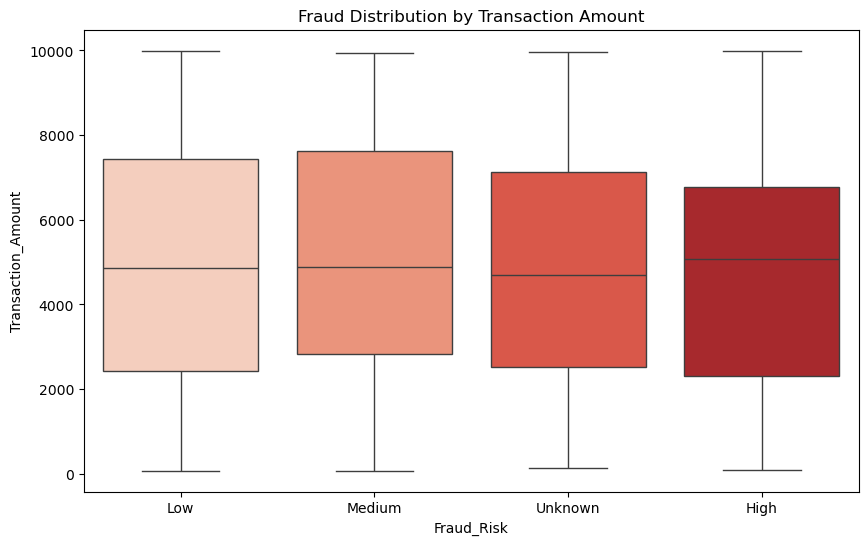

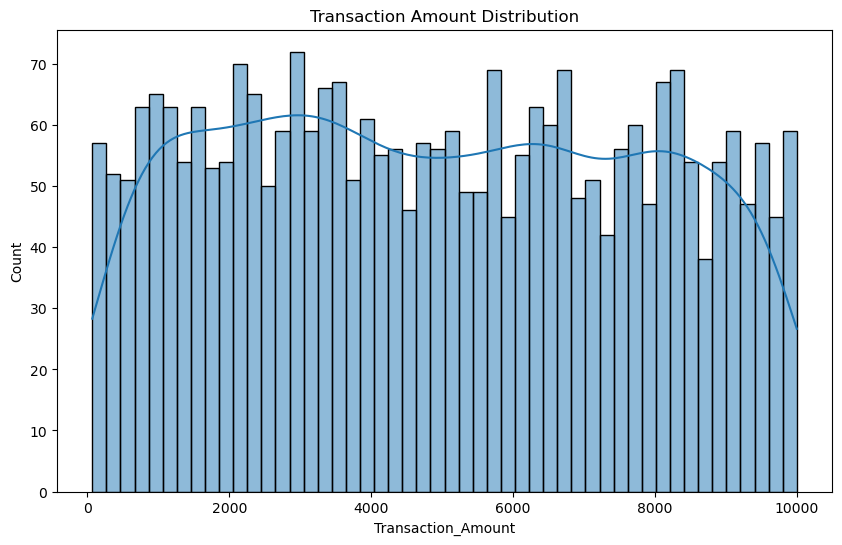

In [7]:
# Fraud risk distribution
plt.figure(figsize=(10,6))
sns.boxplot(x="Fraud_Risk", y="Transaction_Amount", data=financial_df, palette="Reds")
plt.title("Fraud Distribution by Transaction Amount")
plt.show()

# Histogram of transaction amounts
plt.figure(figsize=(10,6))
sns.histplot(financial_df["Transaction_Amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

* Most fradulent transactions are within the amount of 1000-7000
* Most of the fraud transactions happen if the amount is around 5000

## INSIGHTS

* We can implement stricter security checks for payments within the range of 1000-7000.
* We can setup alerts and AI- based fruad detections models strictly for transactions around 5000.

In [9]:
financial_df.to_csv("cleaned_fraud_data.csv", index=False)